In [2]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

$p(\mathbf{t}|\mathbf{X}, \mathbf{w}, \beta) = \prod_{n=1}^{N} \mathcal{N}(t_i | \mathbf{w}^T \mathbf{x}_n, \beta^{-1})$

$p(\mathbf{w}) = \mathcal{N}(\mathbf{w}|\mathbf{m}_0, \mathbf{S}_0)$

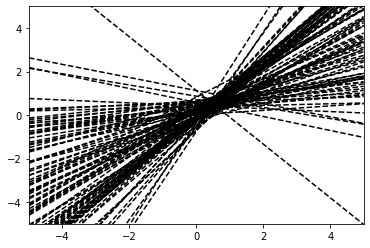

In [5]:
def main():
    posterior = True
    beta = 5.0
    plotsize = 5
    m0 = np.array([0, 0])
    S0 = 1.0*np.eye(2)
    S0inv = np.linalg.inv(S0)
    X = np.array([[1.0, 0.0], [1.0, 0.5], [1.0, 1.0]])
    t = np.array([0.0, 0.5, 1.0])
    SN = np.linalg.inv(S0inv + beta*np.matmul(X.transpose(), X))
    mN = np.matmul(SN, np.matmul(S0inv, m0) + beta*np.matmul(X.transpose(), t))
    n_w_samples = 100
    if posterior:
        m = mN
        S = SN
    else:
        m = m0
        S = S0
    for _ in range(n_w_samples):
        w_s = np.random.multivariate_normal(m, S)
        x0_line = np.array([-plotsize, plotsize])
        x1_line = w_s[1]*x0_line + w_s[0]
        plt.plot(x0_line, x1_line, 'k--')
    plt.axis([-plotsize, plotsize, -plotsize, plotsize])
    plt.show()
main()